# Serie temporal del NDVI en un punto de la Albufera de Valencia

Vamos a aplicar un par de scripts en python para hacer este ejercicio de modo automático. La idea es leer como arrays todos los TIFF que haya en una carpeta y extraer el valor basado en este caso en la posición fila, columna dentro del array. Se podría pasar un sahpe de puntos directamente y obtener los valores para cada punto, pero dado que en este ejercicio solo tenemos un punto y es fácil ver en el programa que posición ocupa en el array ese punto, hemos decidido hacerlo de este modo.

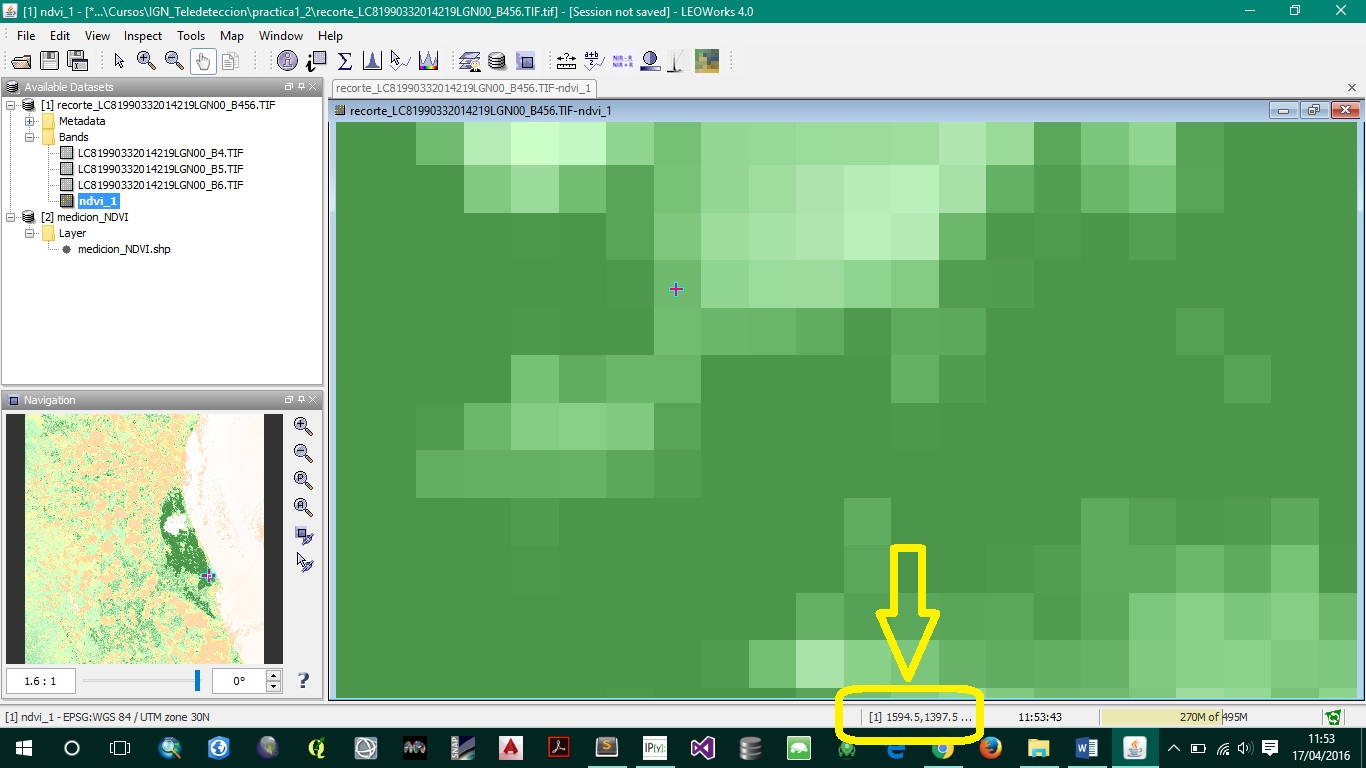

In [79]:
from IPython.display import Image
Image(filename=r'C:\Users\Diego\Documents\GitHub\IGN_Teledeteccion\img\array.jpg') 

In [6]:
import os, time, re

def rename(escena):
    
    sats = {'LC8': 'l8oli', 'LE7': 'l7etm', 'LT5': 'l5tm'}
    fecha=time.strftime("%d-%m-%Y")
    
    sat = escena[:3]
    path =  escena[3:6]
    row = escena[7:9]
    fecha = time.strptime(escena[9:13] + " " + escena[13:16], '%Y %j')
    year = str(fecha.tm_year)
    month = str(fecha.tm_mon)
    if len(month) == 1:
        month = '0' + month
    day = str(fecha.tm_mday)
    if len(day) == 1:
        day = '0' + day

    outname = year +  month  + day + sats[sat] + path + "_" + row
    return outname

Esta primera funcion sirve para renombrar las escenas Landsat del formato USGS al formato YearMonthDaySatPath_Row:

'LC82020342016054LGN00'---> '20160223l8oli202_34' 

Normalmente se usa para renombrar las carpetas originales de Landsat, en este caso solo necesitamos coger los primeros 8 caracteres para "parsear" la fecha que usaremos como entrada al DataFrame que vamos a hacer. En este link se puede ver la funcion rename completa para renombrar todos las escenas que haya en un directorio:

https://github.com/Digdgeo/Landsat8_Corrad_Embalses/blob/master/rename.py

In [57]:
import numpy, rasterio, os, time
from datetime import datetime

t = time.time()

data = {}
path = r'C:\Users\Diego\Desktop\Trabajos_MetaProtocolo\Cursos\IGN_Teledeteccion\practica1_2'

for i in os.listdir(path):
    
    if i.endswith('.tif'):
    
        raster = os.path.join(path, i)
        escena = rename(i[8:-13])
        date = datetime(int(escena[:4]), int(escena[4:6]), int(escena[6:8]))
                         
        with rasterio.open(raster) as src:
            
            red, nir, swir = src.read()
            num = float(nir[1397, 1594]) - float(red[1397, 1594])
            den = float(nir[1397, 1594]) + float(red[1397, 1594])
            
            ndvi = num/den
            data[date] = ndvi

print 'Tiempo transcurrido: ' + str(time.time()-t) + ' segundos'
data

Tiempo transcurrido: 0.637000083923 segundos


{datetime.datetime(2014, 1, 27, 0, 0): -0.04766866371450899,
 datetime.datetime(2014, 2, 12, 0, 0): 0.08715473317243229,
 datetime.datetime(2014, 3, 16, 0, 0): 0.07470610542282898,
 datetime.datetime(2014, 4, 17, 0, 0): 0.07081247107333698,
 datetime.datetime(2014, 5, 3, 0, 0): 0.067041892277002,
 datetime.datetime(2014, 5, 19, 0, 0): -0.04050776613860364,
 datetime.datetime(2014, 6, 4, 0, 0): 0.14302403204272363,
 datetime.datetime(2014, 6, 20, 0, 0): 0.24894436453064822,
 datetime.datetime(2014, 7, 22, 0, 0): 0.5826940007546221,
 datetime.datetime(2014, 8, 7, 0, 0): 0.3793416693384632,
 datetime.datetime(2014, 9, 8, 0, 0): 0.42251377210785734,
 datetime.datetime(2014, 10, 10, 0, 0): 0.11354581673306773,
 datetime.datetime(2014, 10, 26, 0, 0): -0.01765046296296296,
 datetime.datetime(2014, 12, 29, 0, 0): -0.05766033773733485}

Ya hemos extraido el valor del pixel para todas las escenas (en 0,63 segundos), lo que hemos hecho ha sido obtener el valor del pixel en las bandas roja y NIR y aplicar el calculo del NDVI con esos valores, que despues se han pasado a un diccionario en el que la clave es la fecha de la escena y el valor el NDVI.

Ahora pasamos ese diccionario a un DataFrame de pandas y ya podemos "plotearlo"

In [58]:
import pandas as pd

a = pd.DataFrame(sorted(data.items()))
a

,0,1
0,2014-01-27,-0.047669
1,2014-02-12,0.087155
2,2014-03-16,0.074706
3,2014-04-17,0.070812
4,2014-05-03,0.067042
5,2014-05-19,-0.040508
6,2014-06-04,0.143024
7,2014-06-20,0.248944
8,2014-07-22,0.582694
9,2014-08-07,0.379342


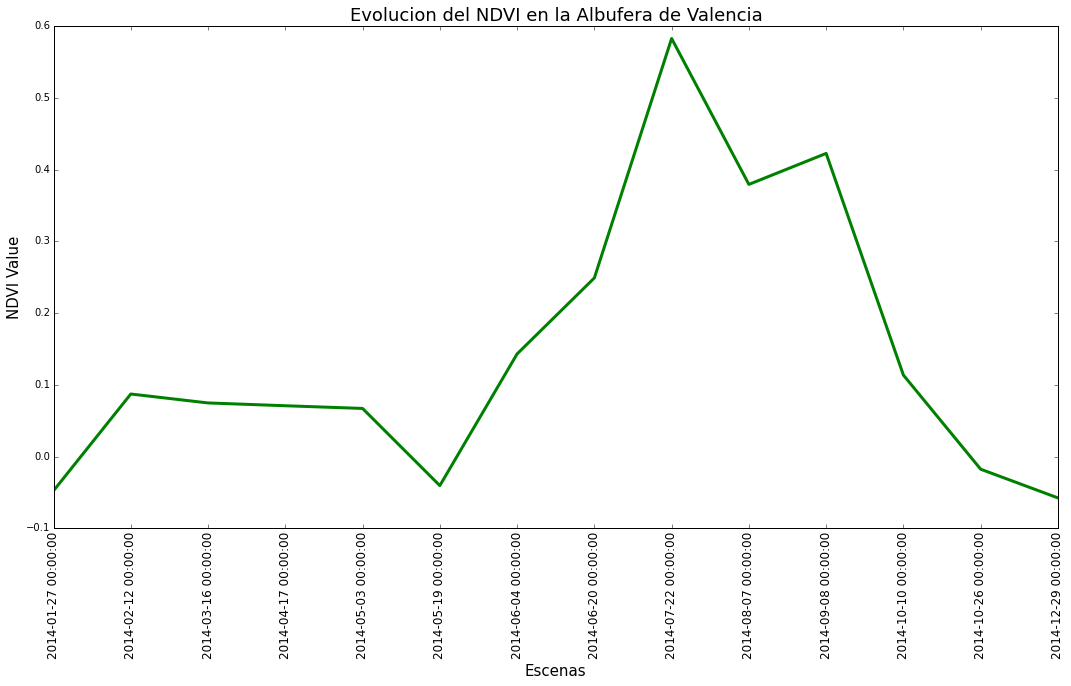

In [75]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
plt.xticks(range(len(data.values())), sorted(data.keys()), size='large', rotation='vertical')
plt.xlabel('Escenas', fontsize=15)
plt.ylabel('NDVI Value', fontsize=15)
plt.title('Evolucion del NDVI en la Albufera de Valencia', fontsize = 18)

plt.plot(a[1], c='green', linewidth=3)